# Mini-Projet : Le Pendule - Compte-rendu

## Introduction

Les systèmes oscillants sont omniprésents en physique et en ingénierie, des structures mécaniques aux circuits électriques en passant par les phénomènes naturels. Parmi eux, le **pendule simple** constitue un modèle fondamental permettant d’illustrer divers comportements dynamiques en fonction des conditions initiales et des forces appliquées. L’objectif de ce mini-projet est d’analyser numériquement l’évolution d’un pendule sous différentes conditions, en mettant en œuvre la **méthode de Runge-Kutta d’ordre 4 (RK4)** pour résoudre son équation du mouvement.

Cette dernière fonctionne en estimant l'état suivant du système $e_{i+1}$ en fonction de l'état actuel $e_i$, et de plusieurs évaluations de la dérivée :

1. $d_1$ évalue la dérivée au point de départ $t_{initial}$ ;
2. $d_2$ évalue la dérivée à $t_{initial} + \frac{pas}{2}$ en tenant compte de $d_1$ ;
3. $d_3$ évalue la dérivée à $t_{initial} + \frac{pas}{2}$ en tenant compte de $d_2$ ;
4. $d_4$ évalue la dérivée à $t_{initial} + pas$ en tenant compte de $d_3$.

La mise à jour de l'état du système est ensuite effectuée par une moyenne pondérée :

$$e_{i+1} = e_i + \frac{pas}{6} \times (d_1 + 2d_2 + 2d_3 + d_4)$$

Nous commencerons par étudier le **pendule amorti**, où les forces de frottement fluides influencent progressivement l’amplitude des oscillations. Nous examinerons différents régimes en fonction du coefficient d’amortissement q, afin d’observer comment l’énergie du système décroît au fil du temps.

Ensuite, nous introduirons une **force excitatrice externe**, ajoutant ainsi une **source d’énergie périodique** au pendule. Ce forçage modifie profondément la dynamique du système et peut engendrer des comportements oscillatoires entretenus ou amplifiés, voire des régimes de résonance. À travers l’analyse des trajectoires dans l’**espace des phases**, nous comparerons l’évolution du pendule dans trois cas distincts : libre, amorti, et amorti avec excitation.

Enfin, nous abandonnerons l’approximation des petits angles pour nous plonger dans le cadre **non linéaire**, où le terme $\sin\theta$ ne peut plus être simplifié en $\theta$. Cette modification ouvre la porte à des phénomènes complexes et imprévisibles, notamment le **chaos**, caractérisé par une dépendance exponentielle aux conditions initiales. Nous explorerons cet aspect en simulant le comportement du pendule sous différentes intensités d’excitation et en étudiant la **sensibilité aux conditions initiales**, une propriété emblématique des systèmes chaotiques.

Avant de débuter notre effort de modélisation, il est nécessaire de rappeler les formules et informations clés du problème.

### a) Equation du mouvement

Nous considérons un **pendule simple** dont l’équation du mouvement est donnée par :

$$\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}sin(\theta)=0$$

où $\theta(t)$ représente l’angle du pendule par rapport à la verticale, $\Omega=\sqrt{\frac{g}{l}}$ la pulsation propre, et q le coefficient d’amortissement. Par commodité, nous fixerons $\Omega = 1$ rad/s.

Sous l’hypothèse des **petits angles**, $sin(\theta) \approx \theta$. L'équation se simplifie ainsi :

$$\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0$$

### b) Notion de force d'excitation

L’ajout d’une **force d’excitation** à un système oscillant modifie profondément sa dynamique en lui imposant une source d’énergie externe. Contrairement au cas du pendule libre ou amorti, où le mouvement est déterminé uniquement par l’inertie et les forces résistantes, l’excitation externe introduit un **forçage** qui peut entraîner des comportements tels que la résonance ou des régimes stationnaires périodiques.

Dans notre cas, l’équation du mouvement devient :

$$\frac{\mathrm{d}^2\theta}{\mathrm{d}t^2} + q\frac{\mathrm{d}\theta}{\mathrm{d}t} + \Omega^2\theta = F_e\sin(\Omega_e t)$$

Le terme $F_e\sin(\Omega_e t)$ représente la force excitatrice appliquée au pendule. Son effet dépend de l’intensité $F_e$ et de la pulsation $\Omega_e$, qui déterminent la manière dont l’énergie est injectée dans le système.

### c) Abandon de l'hypothèse des petits angles

Lorsqu’on abandonne l’approximation des petits angles ($\sin\theta \approx \theta$), l’équation du mouvement devient **non linéaire**, ouvrant la porte à des dynamiques bien plus complexes, notamment le **chaos**.

L’équation complète du pendule avec excitation devient alors :

$$\frac{\mathrm{d}^2\theta}{\mathrm{d}t^2} + q\frac{\mathrm{d}\theta}{\mathrm{d}t} + \Omega^2\sin\theta = F_e\sin(\Omega_e t)$$

Contrairement aux systèmes linéaires, les équations différentielles non linéaires peuvent engendrer des comportements **imprévisibles** et **extrêmement sensibles aux conditions initiales**.

## I. Pendule simple amorti

L’objectif de cette section est d’analyser numériquement la dynamique d’un pendule amorti à l’aide de la méthode de Runge-Kutta d’ordre 4 (RK4). Cette dernière permet d’obtenir une solution numérique de l'équation différentielle et d’analyser visuellement l’effet de l’amortissement sur le mouvement du pendule.

Avant toute chose, fixons les constantes du problème, à savoir la pulsation propre $\Omega$, les conditions initiales (angle et vitesse initiaux $\theta_0 = 10°$ et $\Omega_0 = 0$ rad/s), ainsi que la durée de simulation $t_{max} = 20$s.

In [65]:
import numpy as np
import matplotlib.pyplot as plt

Omega = 1.0  # rad/s
theta0 = np.radians(10)  # rad
omega0 = 0.0  # rad/s
t_max = 20.0  # s

L’analyse des solutions de l'équation de mouvement dépend de la valeur du coefficient q, qui détermine le **régime** dans lequel évolue le pendule :

- Régime **pseudo-périodique** (q < 2) : le système présente des oscillations amorties ;
- Régime **critique** (q = 2) : l’amortissement est juste suffisant pour empêcher toute oscillation ;
- Régime **apériodique** (q > 2) : le pendule revient à sa position d’équilibre sans oscillation.

Nous étudierons ces trois régimes en prenant respectivement q = 1, q = 2 et q = 5 $s^{-1}$.

In [66]:
q_valeurs = [1, 2, 5]

Afin d'appliquer la méthode RK4, **itérative** dans le temps, à cette équation différentielle, et de rendre le temps manipulable numériquement et graphiquement, il est nécessaire de **discrétiser** ce dernier. Le choix du pas est ici crucial : un pas trop grand induit une faible précision et un risque accru d'erreurs, tandis qu'un pas trop petit entraîne des calculs trop longs. Nous fixons alors $dt = 0.05$ s, et utilisons cette constante dans l'optique de discrétiser le temps.

In [67]:
dt = 0.05  # s
t_valeurs = np.arange(0, t_max + dt, dt)

Tout d'abord, créons une fonction définissant le système d'équation différentielle du pendule.

In [68]:
def pendule_amorti(t, etat, q):
    theta, omega = etat
    dtheta_dt = omega
    domega_dt = -q * omega - Omega**2 * theta
    return np.array([dtheta_dt, domega_dt])

Développons ensuite la méthode de Runge-Kutta d'ordre 4 (RK4), prenant en entrée l'équation différentielle dont nous cherchons les solutions sur notre intervalle de temps discrétisé, le coefficient d'amortissement, les conditions initiales, et divers arguments qui nous seront utiles par la suite ($q, F_e, \Omega$, ...).

In [69]:
def RK4(derivee, conditions_ini, t_valeurs=None, debut=None, fin=None, pas=None, **kwargs):
  
    # Soit un tableau de temps est donné, soit il est créé via les variables début, fin et pas
    if t_valeurs is None:
        assert debut is not None and fin is not None and pas is not None, \
            "Si t_values n'est pas fourni, debut, fin et pas doivent être définis."
        intervale = fin - debut
        nombre_points = int(intervale / pas) + 1
        t_valeurs = np.linspace(debut, fin, nombre_points)

    # Initialisation des solutions avec les conditions initiales
    nombre_points = len(t_valeurs)
    solutions = np.empty((nombre_points, len(conditions_ini)))
    solutions[0] = conditions_ini

    # Pas de temps
    dt = t_valeurs[1] - t_valeurs[0]

    # Intégration numérique par Runge-Kutta
    for i in range(nombre_points - 1):
        ti = t_valeurs[i]
        vi = solutions[i]

        # Calcul des coefficients RK4
        d1 = derivee(ti, vi, **kwargs)
        d2 = derivee(ti + dt/2, vi + dt/2 * d1, **kwargs)
        d3 = derivee(ti + dt/2, vi + dt/2 * d2, **kwargs)
        d4 = derivee(ti + dt, vi + dt * d3, **kwargs)

        # Mise à jour des solutions pour t = i + 1
        solutions[i+1] = vi + (dt/6) * (d1 + 2*d2 + 2*d3 + d4)

    return t_valeurs, solutions

Finalement, extrayons les valeurs d'angle $\theta(t)$ du tableau `solutions`, puis traçons son évolution pour chaque valeur de coefficient d'amortissement q choisie ci-dessus.

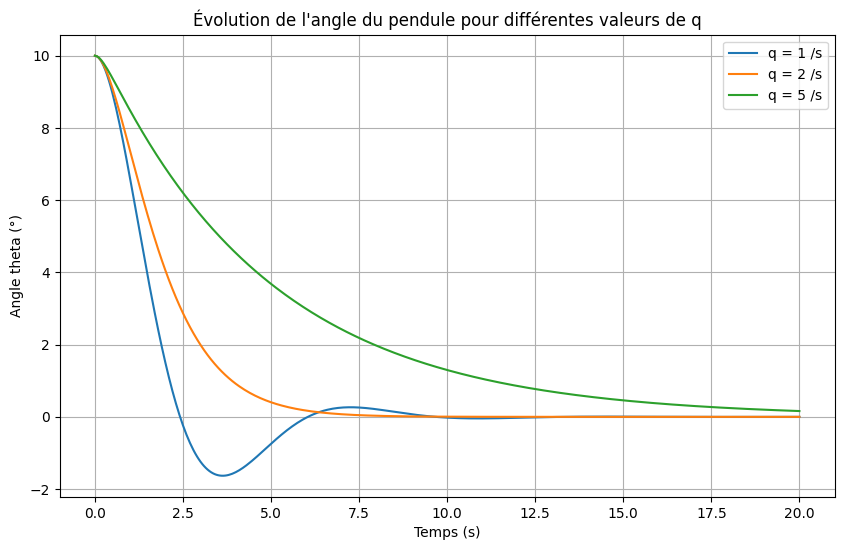

In [70]:
plt.figure(figsize=(10, 6))

for q in q_valeurs:
    t, solution = RK4(pendule_amorti, [theta0, omega0], t_valeurs=t_valeurs, q=q)
    theta_solution = solution[:, 0]
    
    plt.plot(t, np.degrees(theta_solution), label=f"q = {q} /s")

plt.xlabel("Temps (s)")
plt.ylabel("Angle theta (°)")
plt.title("Évolution de l'angle du pendule pour différentes valeurs de q")
plt.legend()
plt.grid()
plt.show()

Nous observons que :

- Pour $q = 1$, correspondant à un régime **pseudo-périodique**, le pendule oscille avec une amplitude décroissante ;
- Pour $q = 2$, associé à un régime dit **critique**, le pendule revient à l'équilibre sans osciller.
- Pour $q = 5$, le régime est **apériodique**, et le pendule revient lentement à l'équilibre sans oscillation.

## II. Force d'excitation

L’ajout d'une force externe modifie la réponse du pendule de plusieurs manières :

- Si l’intensité $F_e$ est faible, le mouvement reste relativement similaire à celui d’un pendule amorti, mais avec des oscillations entretenues par l’excitation.
- Si la pulsation d’excitation $\Omega_e$ est proche de la pulsation propre du système $\Omega$, un phénomène de **résonance** peut apparaître, amplifiant considérablement l’amplitude des oscillations.
- Dans certains cas, des **comportements chaotiques** peuvent émerger, rendant la trajectoire dans l’espace des phases plus complexe.

Afin de mieux comprendre les impacts indépendants et conjoints de l’amortissement et de l’excitation, nous allons comparer trois régimes différents :

1. Le régime **libre**, pour q = 0 et $F_e = 0$, induisant une oscillation sans amortissement ni excitation ;
2. Le régime **amorti**, avec q = 1 et $F_e = 0$, pour lequel les oscillations décroissent progressivement sous l’effet des frottements ;
3. Le régime **amorti avec excitation**, c'est-à-dire pour lequel q = 1, $F_e = 1$ et $\Omega_e = \frac{2\Omega}{3}$, impliquant ainsi une force périodique extérieure.

Définissons d'abord les constantes physiques du problème, à savoir la pulsation excitatrice $\Omega_e$, les conditions initiales ($\theta_0$ et $\Omega_0$), ainsi que la configuration temporelle.

In [71]:
Omega_e = 2*Omega/3 # rad/s
theta0 = 10*np.pi/180 # rad

conditions_ini = [theta0, 0.0]

t_debut = 0 # s
t_fin = 50 # s
pas = 0.01

Ensuite, définissons une fonction permettant de créer une équation différentielle personnalisée selon les valeurs d'amortissement et d'excitation traitées.

In [72]:
def derivee_generique(t, v, q, Fe, Omega, Omega_e):
    theta, dtheta = v
    return np.array([dtheta, -q * dtheta - Omega**2 * theta + Fe * np.sin(Omega_e * t)])

Finalement, calculons les solutions des trois cas mentionnés ci-dessus par le biais de la méthode RK4.

In [73]:
t1, solution_1 = RK4(derivee_generique, conditions_ini, debut=t_debut, fin=t_fin, pas=pas, q=0, Fe=0, Omega=Omega, Omega_e=Omega_e)
t2, solution_2 = RK4(derivee_generique, conditions_ini, debut=t_debut, fin=t_fin, pas=pas, q=1, Fe=0, Omega=Omega, Omega_e=Omega_e)
t3, solution_3 = RK4(derivee_generique, conditions_ini, debut=t_debut, fin=t_fin, pas=pas, q=1, Fe=1, Omega=Omega, Omega_e=Omega_e)

Pour visualiser ces régimes, nous tracerons l’évolution des trajectoires dans **l’espace des phases** $\left(\theta, \frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$, qui permet de mieux comprendre la dynamique du pendule.

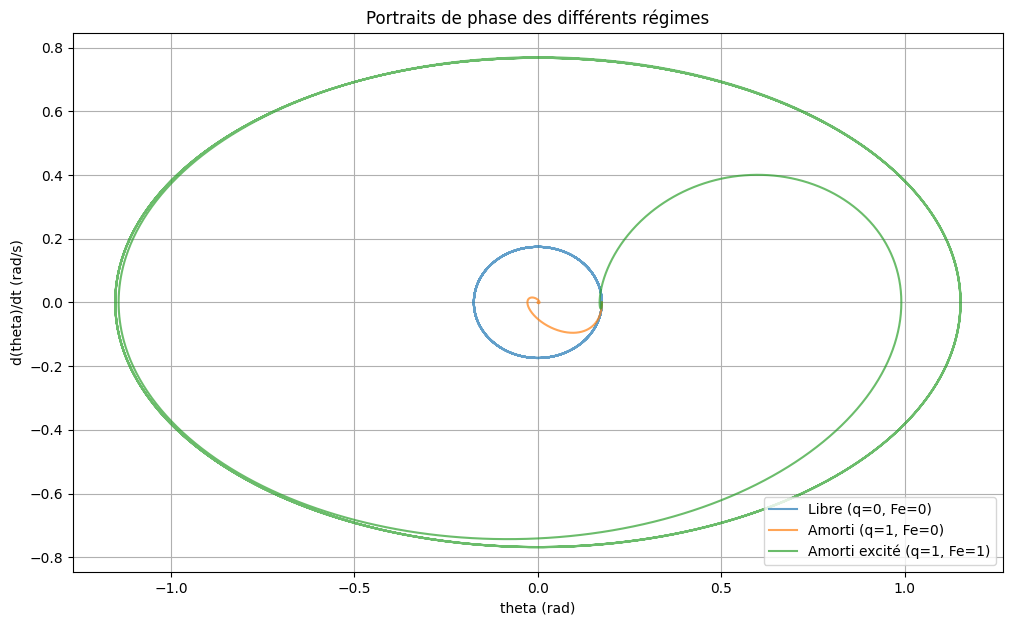

In [74]:
# Tracé des solutions
plt.figure(figsize=(12, 7))
plt.plot(solution_1[:, 0], solution_1[:, 1], label='Libre (q=0, Fe=0)', alpha=0.7)
plt.plot(solution_2[:, 0], solution_2[:, 1], label='Amorti (q=1, Fe=0)', alpha=0.7)
plt.plot(solution_3[:, 0], solution_3[:, 1], label='Amorti excité (q=1, Fe=1)', alpha=0.7)

plt.title('Portraits de phase des différents régimes')
plt.xlabel('theta (rad)')
plt.ylabel('d(theta)/dt (rad/s)')
plt.grid()
plt.legend()
plt.show()

Nous constatons que, dans l'espace des phases $\left(\theta, \frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ :
- Un pendule **libre** ($q = 0, F_e = 0$) décrit des ellipses fermées d'amplitude constante dans le temps, correspondant aux oscillations périodiques.
- Un pendule **amorti** ($q = 1, F_e = 0$) voit sa trajectoires, d'amplitude décroîssant exponentiellement, spiraler vers l’origine, témoignant de la dissipation progressive de son énergie par frottement. 
- Un pendule **amorti excité** ($q = 1, F_e = 1$) peut atteindre un régime stationnaire périodique où sa trajectoire s’établit autour d’une ellipse fermée limite. L'énergie apportée par l'excitation compense alors les pertes énergétiques liées aux frottements.

## III. Mouvement Chaotique

Pour observer des dynamiques chaotiques, nous allons étudier l’évolution du pendule sous une force excitatrice avec différents niveaux d’intensité $F_e = \{1.4, 1.44, 1.465, 1.5\} \, \text{rad} \cdot \text{s}^{-2}$. Nous fixerons les paramètres suivants :

- Coefficient d’amortissement : $q = 0.5 \, \text{s}^{-1}$
- Pulsation d’excitation : $\Omega_e = \frac{2\Omega}{3}$

In [75]:
Omega = 1.0 # rad/s
Omega_e = 2*Omega/3 # rad/s
q = 0.5 # /s
Fe_valeurs = [1.4, 1.44, 1.465, 1.5]

Ces paramètres seront intégrés numériquement via la méthode RK4 sur un intervalle de 100 secondes, ce qui nous permettra d’observer l'évolution du pendule sur le **long terme**.

In [76]:
# Conditions initiales
theta0 = 10*np.pi/180  # rad
v_ini = [theta0, 0.0]

# Configuration temporelle
t_debut = 0 #s
t_fin = 100 #s
pas = 0.01 #s

Le pendule étant un **système angulaire**, il est nécessaire de maintenir l’angle $\theta$ dans l’intervalle $[- \pi, \pi]$ pour éviter des discontinuités numériques. Nous ajouterons donc deux conditions dans la boucle de calcul RK4 :

1. Si $\theta > \pi$, on soustrait $2\pi$.
2. Si $\theta < -\pi$, on ajoute $2\pi$.

Adaptons donc la fonction RK4 définie plus tôt afin de respecter ces conditions.

In [77]:
def RK4(debut, fin, pas, v_ini, derivee):
    
    interval = fin - debut
    nombre_points = int(interval / pas) + 1
    t = np.linspace(debut, fin, nombre_points)
    v = np.zeros((2, nombre_points))
    v[:, 0] = v_ini
    
    for i in range(nombre_points - 1):
        ti = t[i]
        vi = v[:, i]
        
        # Calcul des dérivées intermédiaires
        d1 = derivee(vi, ti)
        d2 = derivee(vi + pas/2 * d1, ti + pas/2)
        d3 = derivee(vi + pas/2 * d2, ti + pas/2)
        d4 = derivee(vi + pas * d3, ti + pas)
        
        # Mise à jour de la solution
        v[:, i+1] = vi + (pas/6)*(d1 + 2*d2 + 2*d3 + d4)

        # Maintien de theta dans l'intervalle [-pi, pi]
        if v[0, i+1] > np.pi:
            v[0, i+1] -= 2 * np.pi
        if v[0, i+1] < -np.pi:
            v[0, i+1] += 2 * np.pi
    
    return t, v

Ensuite, modifions la fonction `derivee_generique` définie dans la partie suivante afin de l'adapter à une équation différentielle non linéaire.

In [78]:
def derivee_nonlineaire(Fe):
    def func(v, t):
        theta, dtheta = v
        return np.array([dtheta, -q*dtheta - Omega**2*np.sin(theta) + Fe*np.sin(Omega_e*t)])
    return func

L’un des aspects caractéristiques des systèmes chaotiques est la **perte de périodicité** à mesure que certains paramètres sont modifiés :

- Pour des valeurs modérées de $F_e$, le pendule peut exhiber un comportement périodique, même s'il n'est pas nécessairement sinusoïdal.
- À mesure que $F_e$ augmente, le mouvement devient plus complexe et peut perdre toute structure périodique identifiable.

Dès lors, afin de vérifier la véracité de ce comportement, appliquons la méthode RK4 afin de représenter graphiquement l'évolution de l'angle $\theta$ en fonction du temps, pour différentes forces d'excitation.

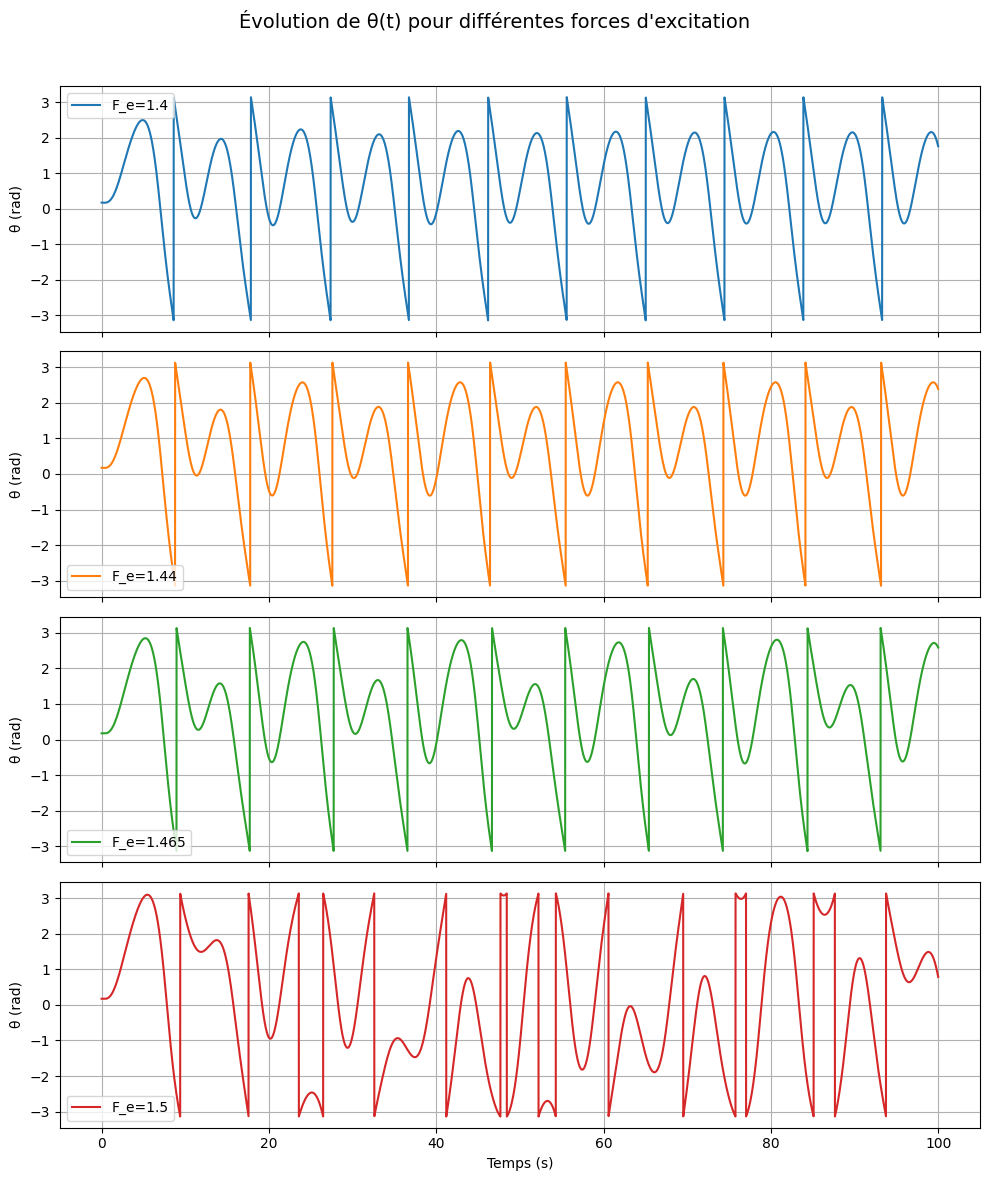

In [79]:
fig, axes = plt.subplots(len(Fe_valeurs), 1, figsize=(10, 12), sharex=True)

for i, Fe in enumerate(Fe_values):
    t, sol = RK4(t_debut, t_fin, pas, v_ini, derivee_nonlineaire(Fe))
    axes[i].plot(t, sol[0], label=f"F_e={Fe}", color=f"C{i}")
    axes[i].set_ylabel("θ (rad)")
    axes[i].legend()
    axes[i].grid()

axes[-1].set_xlabel("Temps (s)")
fig.suptitle("Évolution de θ(t) pour différentes forces d'excitation", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Nous déduisons des 4 graphes ci-dessus les informations suivantes :
- Pour $F_e = 1.4$, le mouvement est **quasi-périodique**, et comporte un motif répétitif ;
- Pour $F_e = 1.44$, la variation de $\theta$ se **complexifie**, et la présence d'un motif est moins évidente ;
- Pour $F_e = 1.465$, le régime devient **chaotique**, avec des motifs imprévisibles ;
- Pour $F_e = 1.5$, le **chaos** est bel et bien développé, avec des sauts brutaux et fortement non périodiques.

Un indicateur clé du chaos est la **dépendance exponentielle aux conditions initiales**, souvent associée à **l’Effet Papillon**. Pour tester cette propriété, comparons, pour une force excitatrice donnée $F_e = 1.5 rad.s^{-2}$, deux trajectoires issues de conditions initiales **très proches** :

- Cas 1 : $\theta(0) = 10^\circ$
- Cas 2 : $\theta(0) = 9.999^\circ$

Si la différence croît exponentiellement, cela signifie que le système est chaotique.

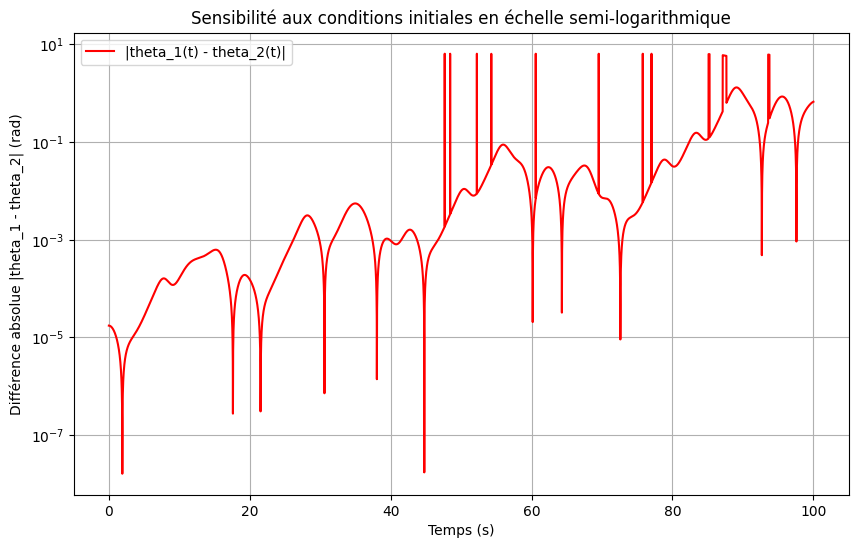

In [80]:
# Modification légère des conditions initiales
Fe_sensibilite = 1.5
theta0_alternatif = 9.999*np.pi/180
v_ini_alternatif = [theta0_alternatif, 0.0]

# Calcul des deux solutions
t, solution_1 = RK4(t_debut, t_fin, pas, v_ini, derivee_nonlineaire(Fe_sensibilite))
_, solution_2 = RK4(t_debut, t_fin, pas, v_ini_alternatif, derivee_nonlineaire(Fe_sensibilite))

# Calcul de la différence absolue entre les deux solutions
theta_diff = np.abs(solution_1[0] - solution_2[0])

# Tracé en échelle semi-logarithmique
plt.figure(figsize=(10, 6))
plt.semilogy(t, theta_diff, label="|theta_1(t) - theta_2(t)|", color="r")
plt.xlabel("Temps (s)")
plt.ylabel("Différence absolue |theta_1 - theta_2| (rad)")
plt.title("Sensibilité aux conditions initiales en échelle semi-logarithmique")
plt.legend()
plt.grid()
plt.show()

L’analyse du graphe met en évidence une sensibilité **exponentielle** aux conditions initiales, caractéristique des systèmes chaotiques : en effet, la **divergence** exponentielle des trajectoires se manifeste sous la forme d’une croissance de tendance **affine** en échelle logarithmique.

D’un point de vue physique, cette dynamique complexe trouve son origine dans le **terme non linéaire $\sin(\theta)$**, qui introduit des **couplages complexes** entre les différentes composantes du mouvement. Le régime chaotique ainsi obtenu est marqué par une **dépendance extrême** aux conditions initiales, illustrant l’**Effet Papillon**, où une variation infime de départ entraîne des trajectoires totalement divergentes à long terme.

Enfin, cette évolution chaotique peut être quantifiée mathématiquement par l’**exposant de Lyapunov**, traité durant le mini-projet 2, qui mesure le taux de séparation exponentielle des trajectoires voisines. La pente de la droite en échelle logarithmique observée ci-dessus correspond précisément à cet exposant, et confirme la nature chaotique du système.

## Conclusion

L’étude du pendule simple nous a permis d’explorer une large gamme de comportements dynamiques en fonction des paramètres du système. Grâce à l’intégration numérique par la méthode de Runge-Kutta d’ordre 4 (RK4), nous avons pu analyser l’évolution du pendule dans différents régimes, allant des oscillations amorties classiques jusqu’aux dynamiques chaotiques.